In [1]:
# For division
from __future__ import division

#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from yahoo_fin.stock_info import get_data

# For time stamps
from datetime import datetime

In [2]:
end = datetime.now()
start = datetime(end.year- 1, end.month, end.day)

stock_list = ['PFE','MRNA','AZN']

# for stock in stock_list:
#     globals()[stock] = DataReader(stock,'yahoo',start,end)

for stock in stock_list:
    globals()[stock] = get_data(stock, start_date=start, end_date=end)

In [3]:
# Summary Stats
PFE.describe()

,open,high,low,close,adjclose,volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,40.780080,41.196295,40.378008,40.788765,40.055824,3.303960e+07
std,4.861188,5.048687,4.702973,4.874226,5.195222,1.795470e+07
min,33.509998,33.889999,33.360001,33.490002,32.579582,1.198420e+07
25%,36.945002,37.220001,36.629999,36.865000,35.614763,2.199435e+07
50%,39.630001,39.869999,39.279999,39.630001,38.893250,2.820570e+07
75%,43.625000,44.135000,43.165001,43.690001,43.309835,3.758445e+07
max,55.150002,55.700001,53.250000,54.680000,54.680000,1.737533e+08


In [4]:
# General Info
PFE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-12-07 to 2021-12-03
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      251 non-null    float64
 1   high      251 non-null    float64
 2   low       251 non-null    float64
 3   close     251 non-null    float64
 4   adjclose  251 non-null    float64
 5   volume    251 non-null    int64  
 6   ticker    251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [5]:
PFE.head()

,open,high,low,close,adjclose,volume,ticker
2020-12-07,40.660000,41.400002,40.369999,41.250000,39.696774,48253700,PFE
2020-12-08,41.400002,42.770000,41.349998,42.560001,40.957451,87039300,PFE
2020-12-09,43.070000,43.080002,41.130001,41.849998,40.274185,86118500,PFE
2020-12-10,41.820000,42.220001,41.450001,41.730000,40.158703,57749200,PFE
2020-12-11,41.970001,42.070000,40.689999,41.119999,39.571671,60737000,PFE


<AxesSubplot:>

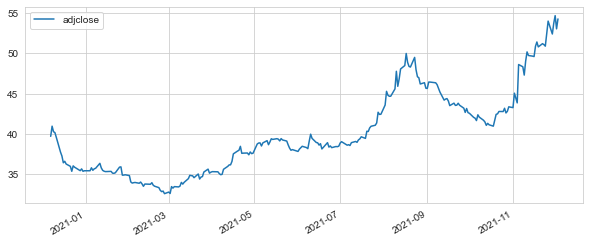

In [6]:
# Let's see a historical view of the closing price
PFE['adjclose'].plot(legend=True,figsize=(10,4))

<AxesSubplot:>

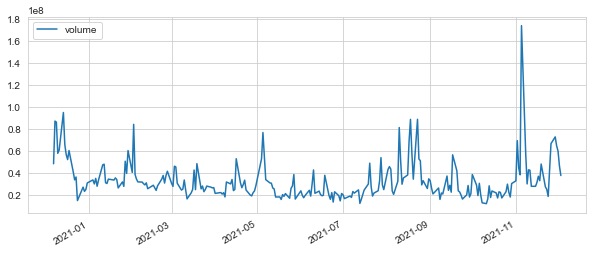

In [7]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
PFE['volume'].plot(legend=True,figsize=(10,4))

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    PFE[column_name]=PFE['adjclose'].rolling(ma).mean()

<AxesSubplot:>

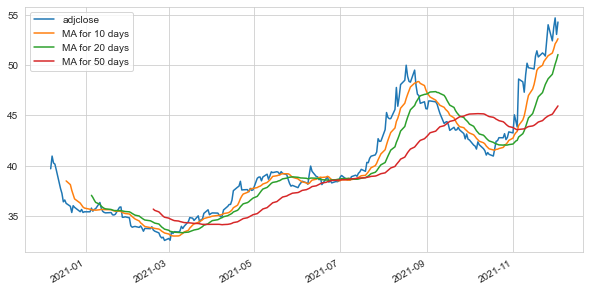

In [9]:
PFE[['adjclose','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,5))

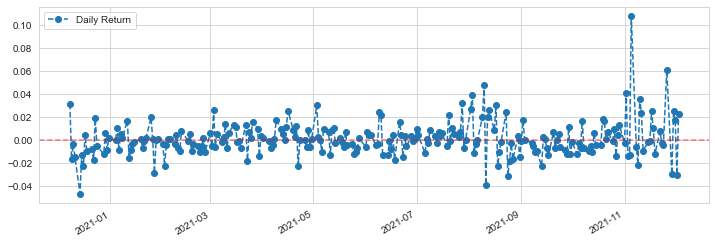

In [10]:
# Use pct_change to find the percent change for each day
PFE['Daily Return'] = PFE['adjclose'].pct_change()
# Then plot the daily return percentage
PFE['Daily Return'].plot(figsize=(12,4),legend=True,linestyle ='--',marker='o')
plt.axhline(y=0,color='red',alpha=0.5,linestyle='--')

C:\Users\z9906\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


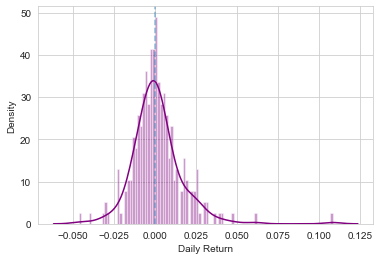

In [11]:
sns.distplot(PFE['Daily Return'].dropna(),bins = 100, color = 'purple')
plt.axvline(x=0,alpha=0.5,linestyle='--')

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pd.DataFrame(columns=stock_list)
for stock in stock_list:
    closing_df[stock] = get_data(stock, start_date=start, end_date=end)['adjclose']
closing_df.head()

,PFE,MRNA,AZN
2020-12-07,39.696777,159.520004,52.807976
2020-12-08,40.957451,169.860001,53.255669
2020-12-09,40.274181,156.589996,52.593864
2020-12-10,40.158707,155.690002,52.447880
2020-12-11,39.571671,156.929993,52.817711


In [13]:
# Make a new tech returns DataFrame
med_rets = closing_df.pct_change()

C:\Users\z9906\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


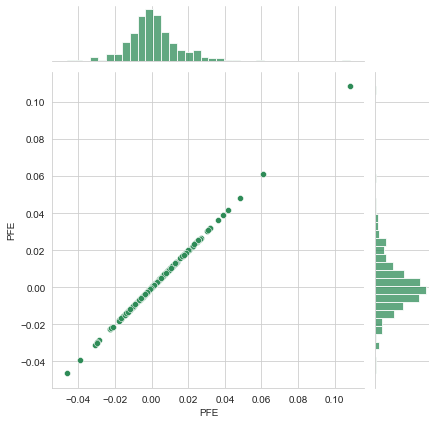

In [14]:
# Comparing Pfizer to itself should show a perfectly linear relationship
sns.jointplot('PFE','PFE',med_rets,kind='scatter',color='seagreen')

C:\Users\z9906\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


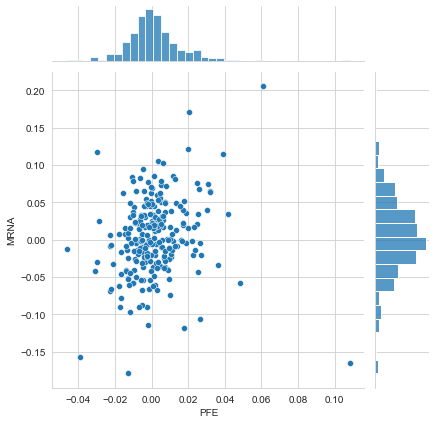

In [15]:
# We'll use joinplot to compare the daily returns of different stocks
sns.jointplot('PFE','MRNA',med_rets,kind='scatter')

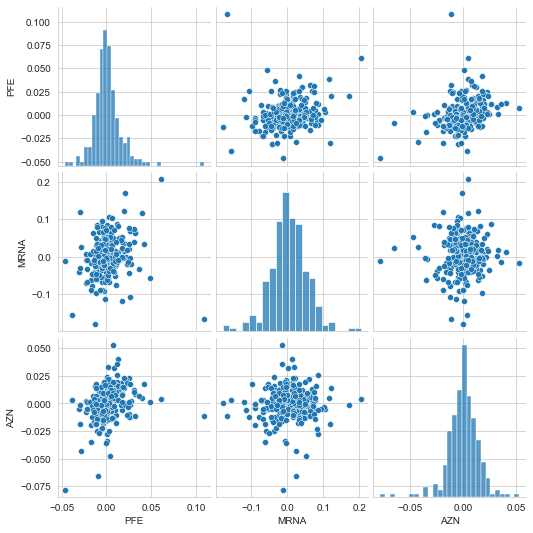

In [16]:
sns.pairplot(med_rets.dropna())

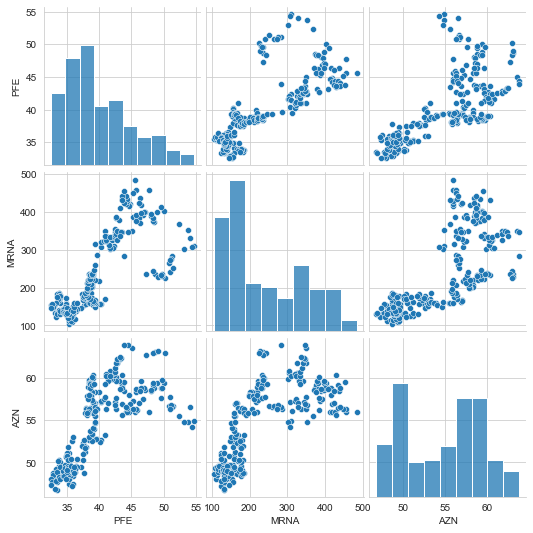

In [17]:
sns.pairplot(closing_df.dropna())

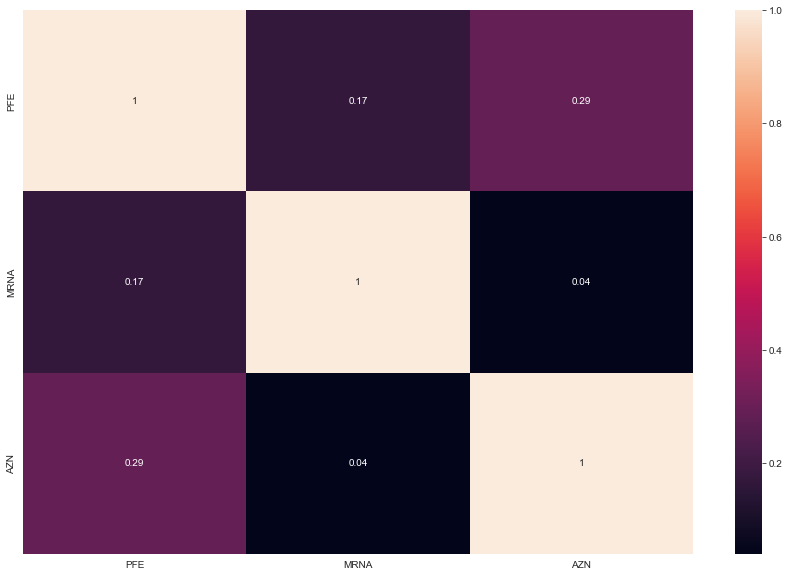

In [18]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(med_rets.corr().dropna(),annot=True,ax=ax);

PFE 0.0013689190752140558 0.015483103117742647
MRNA 0.003917433060957064 0.0509846962067041
AZN 0.00021380704698371433 0.014621365288606115


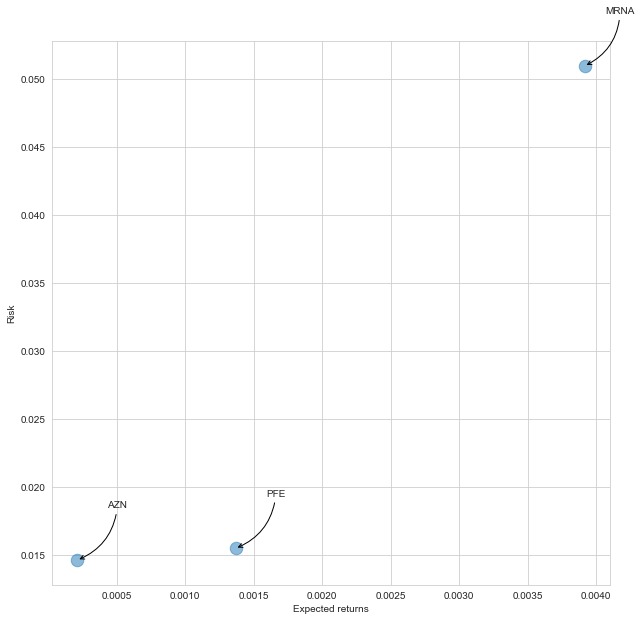

In [19]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = med_rets.dropna()

area = np.pi*50

plt.figure(figsize=(10, 10))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.03])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    print(label,x,y)
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3',color='black'))


## Assume 0.05% expectation (DBS saving account in Singapore) and 0 variance for risk-free return, calculate the Sharpe Ratio for the stocks

In [20]:
sharpe_ratio = (rets.mean() - 0.05 / 100) / (rets.std() ** 2)
sharpe_ratio

PFE     3.624627
MRNA    1.314681
AZN    -1.338699
dtype: float64

In [21]:
print('The Stock with Best Sharpe Ratio Up to {} is {}: {:.3f}'.format(end.date(), sharpe_ratio.index[0], sharpe_ratio[0]))

The Stock with Best Sharpe Ratio Up to 2021-12-06 is PFE: 3.625


#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp


In [22]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for PFE
mu = rets.mean()['PFE']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['PFE']

In [23]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Pfizer')

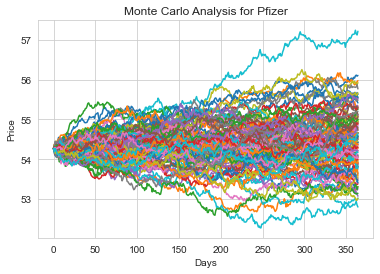

In [25]:
# Get start price from PFE.tail()
start_price_pfe = PFE.tail()['adjclose'][-1]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_pfe,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Pfizer')

In [27]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations_pfe = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations_pfe[run] = stock_monte_carlo(start_price_pfe,days,mu,sigma)[days-1];

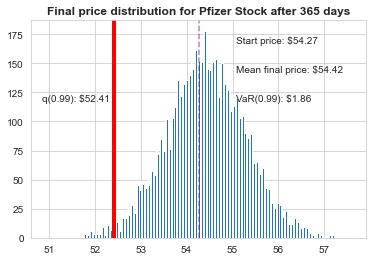

In [29]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations_pfe, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations_pfe,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price_pfe)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations_pfe.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price_pfe - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot a line at the start price
plt.axvline(x=start_price_pfe, color='purple', alpha=0.5, linestyle='--')

# Title
plt.title(u"Final price distribution for Pfizer Stock after %s days" % days, weight='bold');

In [30]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for MRNA
mu = rets.mean()['MRNA']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['MRNA']

start_price_mrna = MRNA['adjclose'][-1]

In [32]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations_mrna = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations_mrna[run] = stock_monte_carlo(start_price_mrna,days,mu,sigma)[days-1];

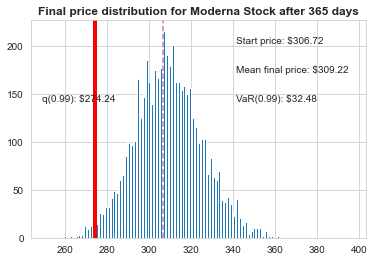

In [33]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations_mrna, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations_mrna,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price_mrna)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations_mrna.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price_mrna - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot a line at the start price
plt.axvline(x=start_price_mrna, color='purple', alpha=0.5, linestyle='--')

# Title
plt.title(u"Final price distribution for Moderna Stock after %s days" % days, weight='bold');

In [34]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for MRNA
mu = rets.mean()['AZN']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['AZN']

start_price_azn = AZN['adjclose'][-1]

In [36]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations_azn = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations_azn[run] = stock_monte_carlo(start_price_azn,days,mu,sigma)[days-1];

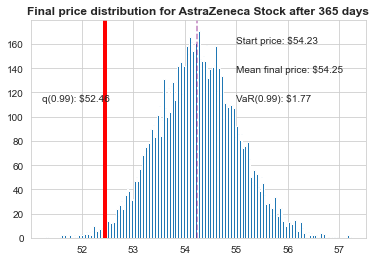

In [38]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations_azn, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations_azn,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price_azn)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations_azn.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price_azn - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot a line at the start price
plt.axvline(x=start_price_azn, color='purple', alpha=0.5, linestyle='--')

# Title
plt.title(u"Final price distribution for AstraZeneca Stock after %s days" % days, weight='bold');

In [39]:
print('Pfizer has a risk of: %s' %(simulations_pfe.std() / simulations_pfe.mean()))
print('Moderna has a risk of: %s' %(simulations_mrna.std() / simulations_mrna.mean()))
print('AstraZeneca has a risk of: %s' %(simulations_azn.std() / simulations_azn.mean()))

Pfizer has a risk of: 0.015654553312190664
Moderna has a risk of: 0.05101912647671929
AstraZeneca has a risk of: 0.014401105905511928


In [40]:
print('Pfizer has a return of: %s' %((simulations_pfe.mean() - start_price_pfe) / start_price_pfe))
print('Moderna has a return of: %s' %((simulations_mrna.mean() - start_price_mrna) / start_price_mrna))
print('AstraZeneca has a return of: %s' %((simulations_azn.mean() - start_price_azn) / start_price_azn))

Pfizer has a return of: 0.002678253083045808
Moderna has a return of: 0.0081666797383244
AstraZeneca has a return of: 0.0002878688681009997


In [41]:
simul_ret = np.array([(simulations_pfe.mean() - start_price_pfe) / start_price_pfe, \
                     (simulations_mrna.mean() - start_price_mrna) / start_price_mrna, \
                     (simulations_azn.mean() - start_price_azn) / start_price_azn])

simul_risk = np.array([simulations_pfe.std() / simulations_pfe.mean(), \
                      simulations_mrna.std() / simulations_mrna.mean(),\
                      simulations_azn.std() / simulations_azn.mean()])

PFE 0.002678253083045808 0.015654553312190664
MRNA 0.0081666797383244 0.05101912647671929
AZN 0.0002878688681009997 0.014401105905511928


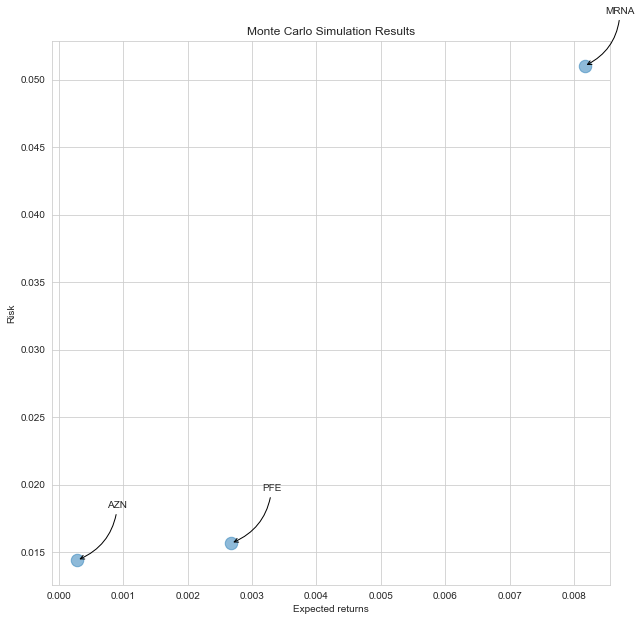

In [42]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = med_rets.dropna()

area = np.pi*50

plt.figure(figsize=(10, 10))
plt.scatter(simul_ret, simul_risk,alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.03])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title('Monte Carlo Simulation Results')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(stock_list, simul_ret, simul_risk):
    print(label,x,y)
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3',color='black'))